In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [23]:
HousePr = pd.read_csv('C:\\Users\\Nikos Spanos\\Documents\\Jupyter_Lab_ReGen\\phase-b\\House Price.csv')

In [24]:
HousePr_new = HousePr.drop(['Id', 'MSSubClass', 'MSZoning', 'Street', 'LotFrontage', 'Alley', 'LandSlope', 'LotConfig', 
              'Utilities', 'LandContour', 'Condition1', 'Condition2', 'RoofStyle', 'RoofMatl', 'BldgType', 
              'MasVnrArea', 'ExterCond', 'ExterQual', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 
              'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'Heating', 'HeatingQC', 'CentralAir',
              'Electrical', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'KitchenAbvGr', 
              'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'FireplaceQu', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageArea', 
              'GarageQual', 'GarageCond', 'PavedDrive', 'PoolArea', 'Fence', 'MoSold', 'SaleType', 'SaleCondition'], axis=1)

In [25]:
HousePr_new.LotShape= HousePr_new.LotShape.map({'Reg':0, 'IR1':1, 'IR2':2, 'IR3':3})

In [26]:
HousePr_new.PoolQC = HousePr_new.PoolQC.map({'Gd':1, 'Fa':1, 'Ex':1})

In [27]:
mapping={'RFn':1, 'Unf':0, 'Fin':1}
HousePr_new.GarageFinish=HousePr_new.GarageFinish.map(mapping)

In [28]:
mapping={'BrkFace':1, 'None':0, 'Stone':2, 'BrkCmn':3}
HousePr_new.MasVnrType=HousePr_new.MasVnrType.map(mapping)
HousePr_new.MasVnrType.fillna(0, inplace=True)

In [29]:
HousePr_new.OpenPorchSF = HousePr_new.WoodDeckSF + HousePr_new.OpenPorchSF + HousePr_new.EnclosedPorch + HousePr_new["3SsnPorch"] + HousePr_new.ScreenPorch

In [30]:
HousePr_new=HousePr_new.drop(['WoodDeckSF', 'EnclosedPorch', '3SsnPorch','ScreenPorch'], axis=1)

In [31]:
HousePr_new.OpenPorchSF=(HousePr_new.OpenPorchSF > 1).astype(int)

In [32]:
from sklearn.preprocessing import StandardScaler

scaled_features = HousePr_new.copy()

col_names = ['LotArea', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'OpenPorchSF', 'MiscVal']
features = scaled_features[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)

C:\Users\Nikos Spanos\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [33]:
scaled_features[col_names] = features
print(scaled_features)

       LotArea  LotShape Neighborhood HouseStyle  OverallQual  OverallCond  \
0    -0.207142         0      CollgCr     2Story            7            5   
1    -0.091886         0      Veenker     1Story            6            8   
2     0.073480         1      CollgCr     2Story            7            5   
3    -0.096897         1      Crawfor     2Story            7            5   
4     0.375148         1      NoRidge     2Story            8            5   
5     0.360616         1      Mitchel     1.5Fin            5            5   
6    -0.043379         0      Somerst     1Story            8            5   
7    -0.013513         1       NWAmes     2Story            7            6   
8    -0.440659         0      OldTown     1.5Fin            7            5   
9    -0.310370         0      BrkSide     1.5Unf            5            6   
10    0.068469         0       Sawyer     1Story            5            5   
11    0.141030         1      NridgHt     2Story            9   

In [34]:
scaled_features.fillna(0, inplace=True)

In [35]:
X = scaled_features.drop(['SalePrice'], axis=1)
X = pd.get_dummies(X)
y = scaled_features['SalePrice'].as_matrix().astype(np.float)
X = X.as_matrix().astype(np.float)

X.shape, y.shape

((1460, 95), (1460,))

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

X_train.shape, y_train.shape

((1095, 95), (1095,))

In [37]:
from sklearn.metrics import mean_squared_log_error
y_test = y_test.astype('float64')

def rmsle(real, predicted):
    sum=0.0
    for x in range(len(predicted)):
        if predicted[x]<0 or real[x]<0: #check for negative values
            continue
        p = np.log(predicted[x]+1)
        r = np.log(real[x]+1)
        sum = sum + (p - r)**2
    return (sum/len(predicted))**0.5

In [38]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)
pred = lr.predict(X_test)

print(rmsle(y_test, pred).round(3))

0.198


In [39]:
from sklearn.neural_network import MLPRegressor
mlp = MLPRegressor()
mlp.fit(X_train, y_train)
pred = mlp.predict(X_test)

print(rmsle(y_test, pred).round(3))

0.409


C:\Users\Nikos Spanos\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [40]:
from sklearn import linear_model

clf = linear_model.Lasso(alpha=1)
clf.fit(X_train, y_train)
pred = clf.predict(X_test)

print(rmsle(y_test, pred).round(3))

0.198


C:\Users\Nikos Spanos\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [41]:
from sklearn.tree import DecisionTreeRegressor
reg = DecisionTreeRegressor(max_depth=1)
reg.fit(X_train, y_train)
pred = reg.predict(X_test)

print(rmsle(y_test, pred).round(3))

0.326


In [44]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
#from sklearn.feature_selection import VarianceThreshold
#from sklearn.decomposition import PCA

pipe = Pipeline(steps=[#('selector', VarianceThreshold()),
                       #('pca', PCA()),
                       ('random_forest',RandomForestRegressor())])

param_grid = {#'selector__threshold': [0.0, 0.005],
              #'pca__n_components': [15, 20],
              'random_forest__n_estimators':[25, 50, 80]}

grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(X_train, y_train)
grid.best_estimator_
preds = grid.predict(X_test)
rmsle(y_test, preds).round(3)

0.162

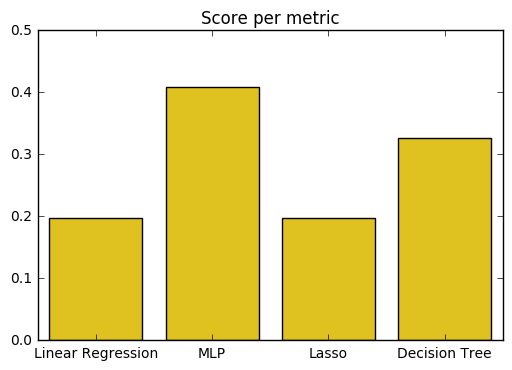

In [43]:
x = ['Linear Regression', 'MLP', 'Lasso', 'Decision Tree']
y = [0.198, 0.409, 0.198, 0.326]

sns.barplot(x, y, color = 'gold')
plt.ylim([0,0.5])
plt.xticks(rotation='horizontal')
plt.title('Score per metric')
plt.show()